In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, fbeta_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

In [2]:
%pip install -U lightautoml
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 21.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 37.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 75.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 18.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 21.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 17.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━

/home/jupyter/.local/lib/python3.10/site-packages/lightautoml/ml_algo/dl_model.py:42: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
/home/jupyter/.local/lib/python3.10/site-packages/lightautoml/text/embed.py:22: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")
/home/jupyter/.local/lib/python3.10/site-packages/lightautoml/text/dl_transformers.py:25: UserWarning: 'transformers' - package isn't installed
  warnings.warn("'transformers' - package isn't installed")


# AutoML на всех признаках

In [3]:
df = pd.read_csv('db_subset.csv')

In [4]:
test_df = pd.concat([df[df['bmi']<35][df['bmi']>25][df['target']==0].sample(n=216),
                    df[df['bmi']<35][df['bmi']>25][df['target']==1].sample(n=216)])
test_df

/tmp/ipykernel_2953/2775990393.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = pd.concat([df[df['bmi']<35][df['bmi']>25][df['target']==0].sample(n=216),
/tmp/ipykernel_2953/2775990393.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test_df = pd.concat([df[df['bmi']<35][df['bmi']>25][df['target']==0].sample(n=216),
/tmp/ipykernel_2953/2775990393.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['bmi']<35][df['bmi']>25][df['target']==1].sample(n=216)])
/tmp/ipykernel_2953/2775990393.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['bmi']<35][df['bmi']>25][df['target']==1].sample(n=216)])


,внутриклеточная_жидкость,тощая_мт,акм,холестерин,нас._жир,натрий_na,сахара,энергия,вода,пищ._волокна,мононенас._жир,белки,аргинин,валин,зола,полиненас._жир,калий_k,крахмал,гистидин,жиры,кальций_ca,алкоголь,кремний_si,сера_s,изолейцин,углеводы,олеиновая_кислота,магний_mg,фруктоза,a,b1_тиамин,b2_рибофлав.,b5_пантотен._кис.,b6_пиридоксин,b9_фолаты,b12_кобаламин,b4_холин,β-каротин,ретин._эквив.,лейцин,фосфор_p,омега-3,лактоза,метионин,железо_fe,омега-6,галактоза,метионин+цистеин,c,треонин,d,триптофан,e_α-токоферол,гамма-линолен._к-та,фенилаланин,h_биотин,бор_b,фенилаланин+тирозин,pp_ниацин,ванадий_v,йод_i,кобальт_co,марганец_mn,медь_cu,молибден_mo,никель_ni,селен_se,фтор_f,хром_cr,цинк_zn,профессия_работники_преимущественно_умственного_труда,профессия_работники_занятые_легким_физическим_трудом,спорт_легкий_спорт,спорт_не_занимаюсь,bmi,target
523,NaN,NaN,NaN,339.49,41.50,2309.63,92.98,2082.27,1081.87,16.17,16.58,119.22,4.04,3.44,16.58,15.85,2673.59,14.43,1.83,96.49,955.49,NaN,NaN,21.60,3.04,222.01,14.27,329.03,5.29,817.61,1.42,2.09,4.79,1.54,335.69,1.88,92.44,37.20,NaN,5.05,1416.89,1.67,NaN,1.67,16.13,6.49,0.02,2.62,150.84,2.76,0.61,0.78,9.32,NaN,2.85,2.45,NaN,5.07,20.42,2.80,97.60,9.93,3.27,1.09,14.23,26.30,135.85,107.99,9.37,8.27,0,0,0,0,28.720083,0
626,NaN,64.5,NaN,344.22,52.38,7095.96,112.10,3505.41,1492.41,43.97,22.98,170.18,5.65,5.10,40.11,19.76,6006.96,47.43,2.74,130.27,1475.75,8.93,NaN,30.00,4.48,427.50,20.39,675.39,3.24,564.74,3.80,3.59,9.87,4.22,733.03,9.56,155.91,15.50,NaN,7.93,2834.33,8.03,NaN,2.50,29.36,10.65,0.02,3.96,101.87,4.05,0.45,1.22,8.07,NaN,4.40,3.00,NaN,7.55,43.18,NaN,473.83,21.33,6.32,2.41,18.83,33.23,243.52,179.78,12.50,12.50,1,0,0,0,30.693878,0
2164,NaN,NaN,NaN,340.13,25.57,2178.01,106.66,1998.45,1610.21,24.85,19.24,74.62,2.76,2.25,14.79,14.52,3583.71,50.35,1.32,77.99,585.22,4.67,0.2,71.49,2.03,251.70,17.86,320.08,24.31,647.16,1.33,1.45,3.21,1.69,254.60,3.22,123.88,199.03,0.17,3.41,1068.98,1.30,NaN,1.04,20.76,11.98,0.01,1.70,103.26,1.87,0.28,0.52,11.03,NaN,1.88,2.92,17.12,3.34,19.55,16.87,31.23,12.96,3.12,1.32,31.94,81.84,75.80,91.44,22.62,7.23,0,1,0,1,31.511111,0
918,NaN,50.0,25.9,443.67,20.89,1049.23,49.00,1552.04,1594.45,12.35,17.68,84.00,4.36,3.42,8.66,12.05,2342.01,42.47,1.94,64.10,362.43,NaN,0.2,19.21,3.12,159.08,16.03,210.66,3.13,425.66,0.96,1.22,4.53,1.77,221.55,2.22,134.70,12.40,NaN,5.13,948.58,1.63,NaN,1.73,10.18,13.89,0.01,2.61,61.61,2.85,0.93,0.76,3.59,NaN,2.77,1.96,NaN,5.08,16.31,1.31,2.70,6.61,3.43,0.95,8.76,18.12,121.11,43.97,6.19,8.84,1,0,0,1,29.053288,0
2671,NaN,NaN,NaN,691.89,75.00,5707.03,253.01,4681.66,3050.78,51.09,35.40,157.36,4.89,3.78,39.85,36.13,6406.10,109.72,1.98,200.08,2682.86,5.46,0.2,116.15,3.20,580.68,33.61,823.19,14.13,1283.24,3.32,4.70,7.19,2.18,758.78,6.45,271.54,202.14,0.08,5.65,3105.46,1.78,0.00,1.54,33.35,21.95,0.04,2.65,185.05,2.86,1.43,0.90,37.00,50.54,3.49,10.75,60.00,5.76,32.69,268.47,256.40,23.90,19.60,2.52,19.15,37.98,144.92,214.91,15.84,13.24,1,0,1,0,30.597470,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860,NaN,39.8,NaN,915.21,94.54,6617.68,255.32,5409.93,3165.93,72.50,45.74,215.40,8.88,7.78,52.04,39.63,9663.29,105.56,4.51,249.63,2616.07,0.16,2.4,270.30,6.79,624.00,41.13,962.16,34.67,2173.16,4.79,5.44,12.25,5.20,906.44,12.43,508.02,174.00,0.08,11.63,3743.74,4.55,0.01,3.48,47.69,17.53,0.04,5.51,593.40,6.20,3.16,1.87,32.92,80.23,6.42,24.00,40.00,11.01,52.57,636.48,316.58,41.63,15.24,3.58,47.67,54.59,249.52,324.12,27.37,24.09,1,0,0,1,31.182473,1
410,NaN,NaN,NaN,645.99,14.87,3169.13,36.44,1123.64,607.30,7.34,10.11,52.80,2.35,2.24,12.30,11.02,1166.65,8.47,1.04,49.14,440.24,NaN,NaN,4.80,1.86,114.30,9.32,162.47,0.48,463.80,0.77,1.16,3.26,0.82,191.63,1.97,235.20,NaN,NaN,3.08,764.09,0.54,NaN,1.02,10.23,4.88,N

In [5]:
train_df = df.drop(test_df.index)
train_df

,внутриклеточная_жидкость,тощая_мт,акм,холестерин,нас._жир,натрий_na,сахара,энергия,вода,пищ._волокна,мононенас._жир,белки,аргинин,валин,зола,полиненас._жир,калий_k,крахмал,гистидин,жиры,кальций_ca,алкоголь,кремний_si,сера_s,изолейцин,углеводы,олеиновая_кислота,магний_mg,фруктоза,a,b1_тиамин,b2_рибофлав.,b5_пантотен._кис.,b6_пиридоксин,b9_фолаты,b12_кобаламин,b4_холин,β-каротин,ретин._эквив.,лейцин,фосфор_p,омега-3,лактоза,метионин,железо_fe,омега-6,галактоза,метионин+цистеин,c,треонин,d,триптофан,e_α-токоферол,гамма-линолен._к-та,фенилаланин,h_биотин,бор_b,фенилаланин+тирозин,pp_ниацин,ванадий_v,йод_i,кобальт_co,марганец_mn,медь_cu,молибден_mo,никель_ni,селен_se,фтор_f,хром_cr,цинк_zn,профессия_работники_преимущественно_умственного_труда,профессия_работники_занятые_легким_физическим_трудом,спорт_легкий_спорт,спорт_не_занимаюсь,bmi,target
0,NaN,NaN,NaN,NaN,0.04,11.03,21.41,128.17,495.78,0.72,0.04,0.93,NaN,NaN,0.75,0.08,378.50,NaN,NaN,0.32,19.83,2.25,NaN,NaN,NaN,28.18,0.04,26.83,NaN,8.00,0.06,0.05,0.03,0.04,49.00,NaN,NaN,NaN,NaN,NaN,33.75,0.02,NaN,NaN,0.72,0.06,NaN,NaN,50.00,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,0.38,NaN,NaN,NaN,0.66,0.11,NaN,NaN,0.21,NaN,NaN,0.17,0,0,0,0,NaN,0
1,NaN,NaN,NaN,NaN,0.02,10.72,12.43,77.82,727.72,0.37,0.02,0.66,NaN,NaN,0.64,0.05,324.95,NaN,NaN,0.19,15.86,0.94,NaN,NaN,NaN,17.79,0.02,23.26,NaN,4.80,0.04,0.06,0.05,0.02,45.40,NaN,NaN,NaN,NaN,NaN,26.08,0.01,NaN,NaN,0.48,0.04,NaN,NaN,30.00,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,1.12,0.11,NaN,NaN,0.24,NaN,NaN,0.15,0,0,0,0,NaN,0
2,NaN,NaN,NaN,NaN,0.04,25.63,19.99,147.13,373.79,0.93,0.04,1.11,NaN,NaN,1.00,0.08,354.73,NaN,NaN,0.34,25.80,4.77,NaN,NaN,NaN,28.46,0.04,29.70,NaN,8.83,0.07,0.03,0.02,0.05,37.83,NaN,NaN,NaN,NaN,NaN,35.00,0.02,NaN,NaN,0.73,0.06,NaN,NaN,53.22,NaN,NaN,NaN,0.08,NaN,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,0.11,0.10,NaN,NaN,0.32,NaN,NaN,0.26,1,0,0,0,NaN,0
3,NaN,NaN,NaN,0.53,0.06,4.42,NaN,2.27,0.42,NaN,0.03,0.14,0.01,0.01,0.02,0.01,2.45,NaN,0.01,0.22,0.12,NaN,NaN,NaN,0.01,NaN,0.02,0.19,NaN,0.02,0.00,0.00,0.00,0.00,0.02,0.01,0.43,NaN,NaN,0.01,1.45,0.00,NaN,0.00,0.02,0.01,NaN,0.01,NaN,0.01,0.00,0.00,0.00,NaN,0.01,NaN,NaN,0.01,0.04,NaN,0.01,NaN,0.00,0.00,NaN,NaN,0.17,NaN,NaN,0.03,0,0,0,0,NaN,0
4,NaN,NaN,NaN,1.08,0.05,1.34,NaN,2.94,1.04,NaN,0.05,0.33,0.03,0.02,0.02,0.00,5.97,NaN,0.02,0.10,0.20,NaN,NaN,NaN,0.02,NaN,0.05,0.40,NaN,0.09,0.00,0.00,0.00,0.00,0.10,0.03,0.82,NaN,NaN,0.04,3.32,0.00,NaN,0.01,0.05,0.00,NaN,0.02,NaN,0.02,NaN,0.01,0.00,NaN,0.02,NaN,NaN,0.03,0.07,NaN,0.02,0.01,0.00,0.00,NaN,NaN,0.26,NaN,NaN,0.08,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2879,18.0,43.3,22.8,148.86,13.66,1495.20,46.12,981.38,792.79,10.46,8.36,30.54,1.16,0.95,8.25,10.06,1370.94,22.00,0.55,45.36,314.95,1.57,1.20,20.88,0.82,119.19,7.66,167.39,4.63,624.41,0.67,0.72,1.72,0.66,134.80,1.20,63.84,124.40,0.02,1.42,519.06,0.77,0.01,0.41,7.36,6.29,0.01,0.72,40.34,0.82,0.32,0.23,6.67,19.18,0.85,0.82,48.00,1.45,10.10,87.20,21.02,4.78,6.31,0.52,3.88,9.44,39.28,45.79,4.36,2.92,1,0,0,1,23.335466,0
2880,30.2,67.3,42.4,477.17,24.50,1797.91,82.62,1354.90,1223.05,12.31,10.50,55.08,1.96,1.71,11.42,5.57,2305.47,17.34,0.88,56.86,760.68,2.33,0.60,15.07,1.44,163.39,9.33,217.28,8.92,466.08,1.00,1.51,2.84,0.95,218.19,3.14,182.73,62.20,0.02,2.45,961.52,0.84,0.02,0.81,11.14,4.89,0.01,1.30,109.94,1.30,1.29,0.38,3.59,60.64,1.41,0.88,6.67,2.51,10.56,181.60,113.14,4.17,4.55,0.73,9.21,24.18,60.15,68.55,6.56,4.58,1,0,0,1,35.986159,0
2881,36.1,77.1,51.6,1867.95,34.70,3373.56,81.50,2929.34,3550.36,20.59,32.17,185.21,11.50,9.37,27.31,23.95,5804.66,45.02,5.17,104.79,1344.17,8.78,0.25,31.35,8.34,270.83,28.52,534.18,7.92,5607.64,2.03,3.12,10.60,3.72,589.55,30.73,406.35,1249.62,0.33,14.14,2606.66,5.33,0.10,4.66,35.63,13

In [6]:
automl = TabularAutoML(task = Task(name = 'binary', metric = 'logloss'))
oof_preds = automl.fit_predict(train_df, roles = {'target': 'target'}).data
test_preds = automl.predict(test_df).data

/home/jupyter/.local/lib/python3.10/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [7]:
test_preds

array([[0.4447025 ],
       [0.7058617 ],
       [0.5727855 ],
       [0.5794028 ],
       [0.47369555],
       [0.5723823 ],
       [0.52719927],
       [0.25307328],
       [0.55905986],
       [0.3399538 ],
       [0.26920116],
       [0.38006526],
       [0.64027864],
       [0.64839256],
       [0.61279225],
       [0.25506184],
       [0.55822855],
       [0.40465486],
       [0.4530778 ],
       [0.42992258],
       [0.36265698],
       [0.406219  ],
       [0.3395263 ],
       [0.5606206 ],
       [0.3237465 ],
       [0.2921236 ],
       [0.40588716],
       [0.34357464],
       [0.34318474],
       [0.2369963 ],
       [0.60361135],
       [0.457798  ],
       [0.4524425 ],
       [0.13681456],
       [0.42347687],
       [0.26734018],
       [0.6865183 ],
       [0.51360583],
       [0.34409904],
       [0.18424064],
       [0.5106145 ],
       [0.22006181],
       [0.14490436],
       [0.4495711 ],
       [0.58662814],
       [0.29165292],
       [0.4801785 ],
       [0.542

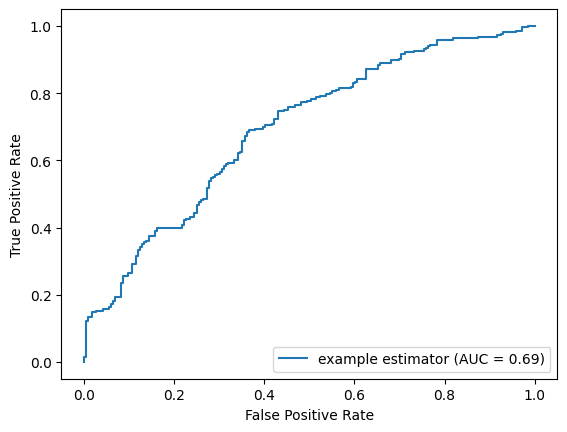

In [8]:
y_true = np.array(test_df['target'])
fpr, tpr, thresholds = metrics.roc_curve(y_true, test_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [9]:
roc_auc_score(y_true, test_preds)

0.6931370027434842

In [10]:
from sklearn.metrics import fbeta_score, accuracy_score, precision_score, recall_score

def f2_score(y_true, y_pred):
  return fbeta_score(y_true, y_pred, beta=2)

In [11]:
def report(y_true, y_pred):
  print(classification_report(y_true, y_pred))
  cm = confusion_matrix(y_true, y_pred, normalize="all")
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, cmap="Reds")
  print("F2-score: ", f2_score(y_true, y_pred))

In [12]:
def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr))
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    return list(roc_t['threshold'])

In [13]:
Find_Optimal_Cutoff(np.array(test_df['target']), test_preds)

[0.4669091999530792]

In [14]:
y_pred_roc = np.zeros(test_preds.shape[0])
for i in range(test_preds.shape[0]):
  if test_preds[i] > Find_Optimal_Cutoff(np.array(test_df['target']), test_preds)[0]: y_pred_roc[i] = 1
  else: y_pred_roc[i] = 0

In [15]:
def get_results(y_true, y_pred_roc):
  round_num = 2
  print( "'Accuracy':", round(accuracy_score(y_true, y_pred_roc),2 ),",",
          "'AUC':", round(roc_auc_score(y_true, y_pred_roc),2 ),",",
          "'Precision':", round(precision_score(y_true, y_pred_roc),2 ),",",
          "'Recall':", round(recall_score(y_true, y_pred_roc),2 ),",",
          "'F1-score':", round(f1_score(y_true, y_pred_roc),2 ),",",
          "'F2-score':", round(fbeta_score(y_true, y_pred_roc, beta = 2),2 )
          )

In [16]:
get_results(y_true, y_pred_roc)

'Accuracy': 0.65 , 'AUC': 0.65 , 'Precision': 0.65 , 'Recall': 0.65 , 'F1-score': 0.65 , 'F2-score': 0.65


# AutoML на признаках ADD-DEL + Boruta

In [17]:
add_del_boruta_features = ['галактоза',
                             'спорт_легкий_спорт',
                             'метионин',
                             'спорт_не_занимаюсь',
                             'метионин+цистеин',
                             'b6_пиридоксин',
                             'bmi',
                             'натрий_na',
                             'внутриклеточная_жидкость',
                             'полиненас._жир',
                           'target']
test_df = df[add_del_boruta_features]
train_df = df[add_del_boruta_features]

In [18]:
automl = TabularAutoML(task = Task(name = 'binary', metric = 'logloss'))
oof_preds = automl.fit_predict(train_df, roles = {'target': 'target'}).data
test_preds = automl.predict(test_df).data

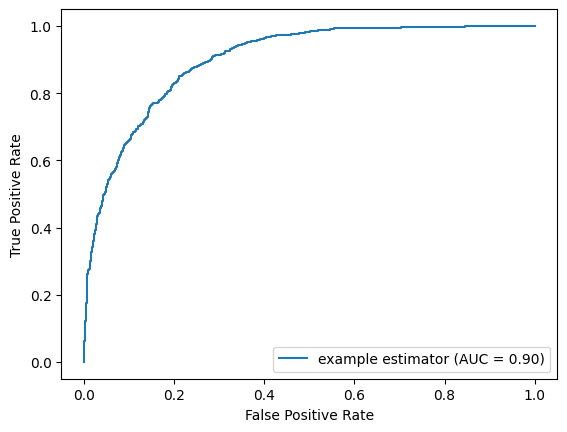

In [19]:
y_true = np.array(test_df['target'])
fpr, tpr, thresholds = metrics.roc_curve(y_true, test_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [20]:
y_pred_roc = np.zeros(test_preds.shape[0])
for i in range(test_preds.shape[0]):
  if test_preds[i] > Find_Optimal_Cutoff(np.array(test_df['target']), test_preds)[0]: y_pred_roc[i] = 1
  else: y_pred_roc[i] = 0

In [21]:
get_results(y_true, y_pred_roc)

'Accuracy': 0.81 , 'AUC': 0.81 , 'Precision': 0.7 , 'Recall': 0.81 , 'F1-score': 0.75 , 'F2-score': 0.78


# AutoML на признаках ADD-DEL + Boruta без ИМТ

In [22]:
add_del_boruta_features_wo_bmi = ['галактоза',
                             'спорт_легкий_спорт',
                             'метионин',
                             'спорт_не_занимаюсь',
                             'метионин+цистеин',
                             'b6_пиридоксин',
                             'натрий_na',
                             'внутриклеточная_жидкость',
                             'полиненас._жир',
                           'target']
test_df = df[add_del_boruta_features_wo_bmi]
train_df = df[add_del_boruta_features_wo_bmi]

In [23]:
automl = TabularAutoML(task = Task(name = 'binary', metric = 'logloss'))
oof_preds = automl.fit_predict(train_df, roles = {'target': 'target'}).data
test_preds = automl.predict(test_df).data

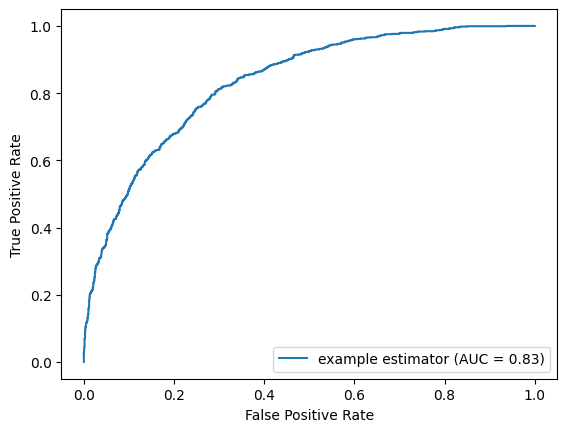

In [24]:
y_true = np.array(test_df['target'])
fpr, tpr, thresholds = metrics.roc_curve(y_true, test_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [25]:
y_pred_roc = np.zeros(test_preds.shape[0])
for i in range(test_preds.shape[0]):
  if test_preds[i] > Find_Optimal_Cutoff(np.array(test_df['target']), test_preds)[0]: y_pred_roc[i] = 1
  else: y_pred_roc[i] = 0

In [26]:
get_results(y_true, y_pred_roc)

'Accuracy': 0.75 , 'AUC': 0.75 , 'Precision': 0.62 , 'Recall': 0.75 , 'F1-score': 0.68 , 'F2-score': 0.72


# AutoML на get_feature_importance (CatBoost)

In [27]:
cb_features = ['тощая_мт', 'β-каротин', 'лактоза', 'омега-6', 'галактоза', 'ванадий_v', 'йод_i', 'марганец_mn', 'bmi', 'target']
test_df = df[cb_features]
train_df = df[cb_features]

In [28]:
automl = TabularAutoML(task = Task(name = 'binary', metric = 'logloss'))
oof_preds = automl.fit_predict(train_df, roles = {'target': 'target'}).data
test_preds = automl.predict(test_df).data

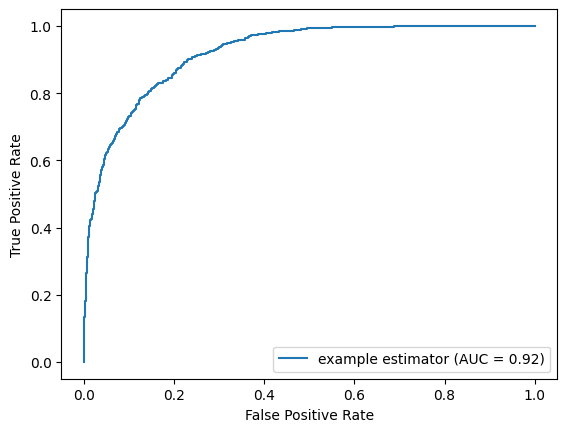

In [29]:
y_true = np.array(test_df['target'])
fpr, tpr, thresholds = metrics.roc_curve(y_true, test_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [30]:
y_pred_roc = np.zeros(test_preds.shape[0])
for i in range(test_preds.shape[0]):
  if test_preds[i] > Find_Optimal_Cutoff(np.array(test_df['target']), test_preds)[0]: y_pred_roc[i] = 1
  else: y_pred_roc[i] = 0

In [31]:
get_results(y_true, y_pred_roc)

'Accuracy': 0.83 , 'AUC': 0.83 , 'Precision': 0.73 , 'Recall': 0.83 , 'F1-score': 0.77 , 'F2-score': 0.81


# AutoML на get_feature_importance (CatBoost) без ИМТ

In [32]:
cb_features_wo_bmi = ['тощая_мт', 'β-каротин', 'лактоза', 'омега-6', 'галактоза', 'ванадий_v', 'йод_i', 'марганец_mn', 'target']
test_df = df[cb_features_wo_bmi]
train_df = df[cb_features_wo_bmi]

In [33]:
automl = TabularAutoML(task = Task(name = 'binary', metric = 'logloss'))
oof_preds = automl.fit_predict(train_df, roles = {'target': 'target'}).data
test_preds = automl.predict(test_df).data

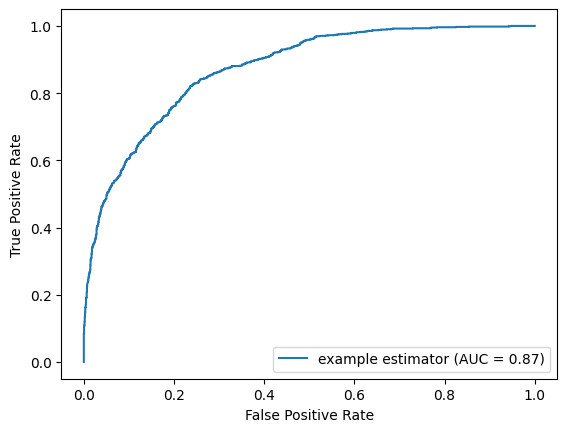

In [34]:
y_true = np.array(test_df['target'])
fpr, tpr, thresholds = metrics.roc_curve(y_true, test_preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()
plt.show()

In [35]:
y_pred_roc = np.zeros(test_preds.shape[0])
for i in range(test_preds.shape[0]):
  if test_preds[i] > Find_Optimal_Cutoff(np.array(test_df['target']), test_preds)[0]: y_pred_roc[i] = 1
  else: y_pred_roc[i] = 0

In [36]:
get_results(y_true, y_pred_roc)

'Accuracy': 0.78 , 'AUC': 0.78 , 'Precision': 0.66 , 'Recall': 0.78 , 'F1-score': 0.72 , 'F2-score': 0.76
